<a href="https://colab.research.google.com/github/toanpham31231023715-cyber/toanpham.githhub.io/blob/main/Bu%E1%BB%95i_04_%C4%90%E1%BA%A7u_t%C6%B0_%C4%91%E1%BB%8Bnh_l%C6%B0%E1%BB%A3ng_d%C3%B9ng_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buổi 04: Đầu tư định lượng dùng Pandas

In [1]:
# !pip install pandas_datareader
# !pip install yfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
%matplotlib inline

# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override() # Removed this line

In [5]:
end = dt.datetime.now()
start = dt.datetime(2016, 1, 1)
print(f'{start} -> {end}')

# Use yfinance to download data
df = yf.download('AAPL', start=start, end=end)

2016-01-01 00:00:00 -> 2025-11-04 02:07:35.757619


/tmp/ipython-input-4027527905.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [6]:
display(df.head())
display(df.tail())

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.776180,23.780695,23.020127,23.157797,270597600
2016-01-05,23.180365,23.889023,23.112659,23.866455,223164000
2016-01-06,22.726732,23.103632,22.539413,22.695136,273829600
2016-01-07,21.767565,22.598095,21.763052,22.270849,324377600
2016-01-08,21.882658,22.367886,21.837521,22.241502,283192000


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-28,269.000000,269.890015,268.149994,268.989990,41534800
2025-10-29,269.700012,271.410004,267.109985,269.279999,51086700
2025-10-30,271.399994,274.140015,268.480011,271.989990,69886500
2025-10-31,270.369995,277.320007,269.160004,276.989990,86096700
2025-11-03,269.049988,270.850006,266.250000,270.420013,48150989


In [7]:
df.loc['2024-04-19']

,,2024-04-19
Price,Ticker,
Close,AAPL,1.638236e+02
High,AAPL,1.652136e+02
Low,AAPL,1.629101e+02
Open,AAPL,1.650249e+02
Volume,AAPL,6.814940e+07


In [9]:
df.to_csv('AAPL.csv')
df1 = pd.read_csv('AAPL.csv')
df1 = df1.set_index(df1.columns[0])
df1.index.name = 'Date'

In [10]:
display(df1)

,Close,High,Low,Open,Volume
Date,,,,,
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,NaN,NaN,NaN,NaN,NaN
2016-01-04,23.776180267333984,23.780694982047198,23.020127407631637,23.157796934778954,270597600
2016-01-05,23.18036460876465,23.88902327269363,23.112659386942752,23.866454865419666,223164000
2016-01-06,22.72673225402832,23.103631715714023,22.5394129236889,22.695136139423642,273829600
...,...,...,...,...,...
2025-10-28,269.0,269.8900146484375,268.1499938964844,268.989990234375,41534800
2025-10-29,269.70001220703125,271.4100036621094,267.1099853515625,269.2799987792969,51086700
2025-10-30,271.3999938964844,274.1400146484375,268.4800109863281,271.989990234375,69886500


<Axes: title={'center': 'AAPL'}, xlabel='Date'>

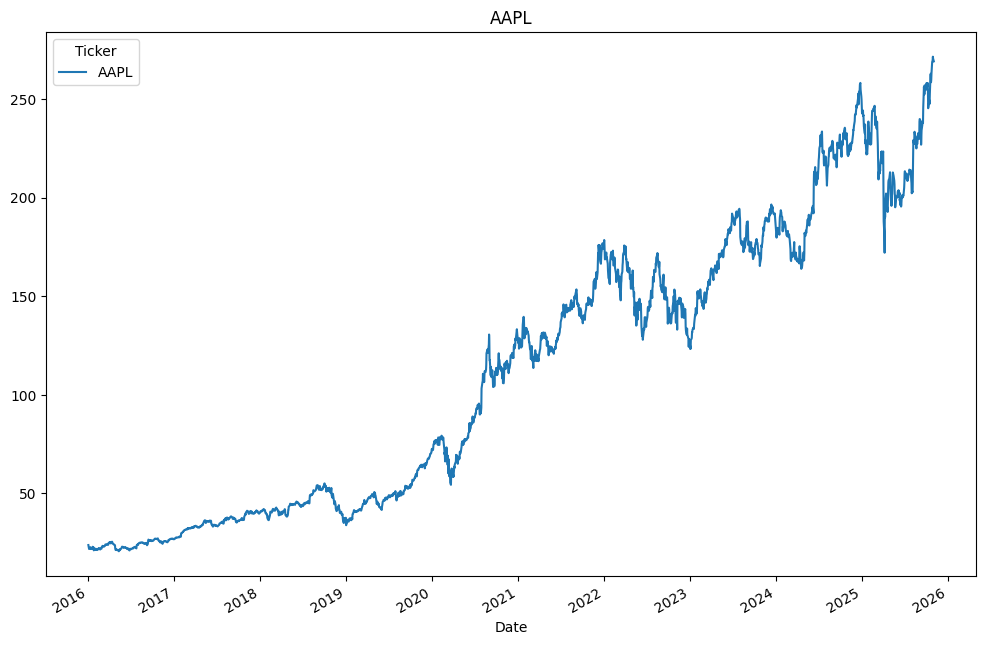

In [12]:
df['Close'].plot(legend=True, figsize=(12,8), title='AAPL', label = 'Close')

Text(0, 0.5, 'Volume')

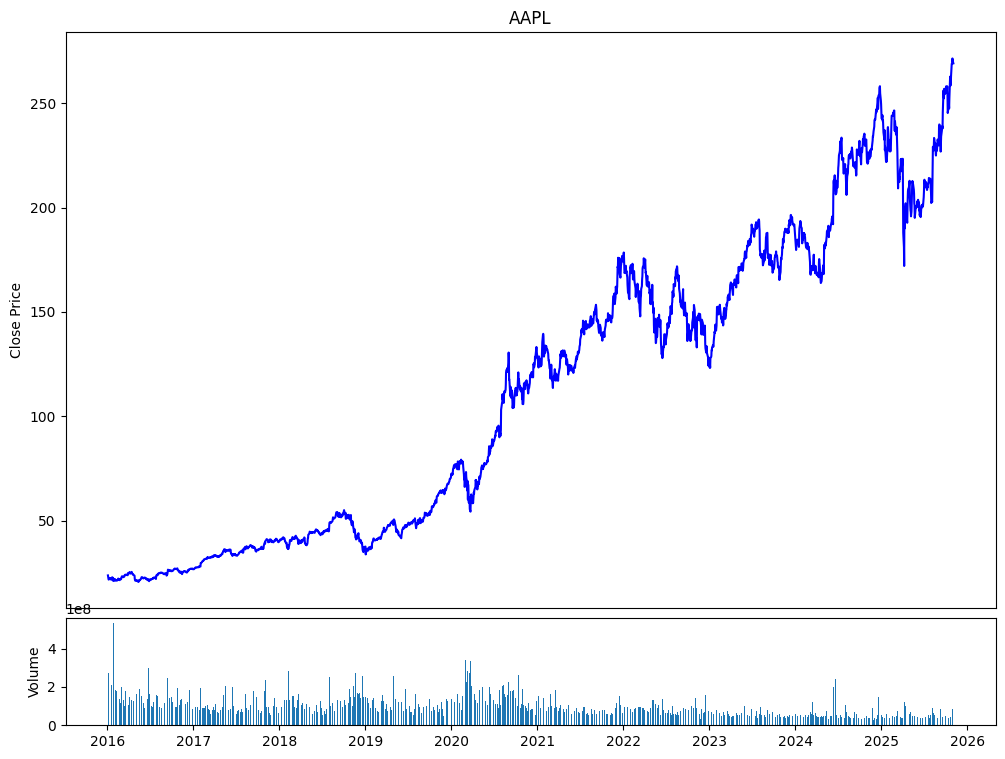

In [18]:
plt.figure(figsize=(12, 9))

top = plt.subplot2grid((12, 9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9)

# Drop the 'Ticker' level from the columns
df.columns = df.columns.droplevel('Ticker')

top.plot(df.index, df['Close'], color='blue')
bottom.bar(df.index, df['Volume'])

top.axes.get_xaxis().set_visible(False)
top.set_title('AAPL')
top.set_ylabel('Close Price')
bottom.set_ylabel('Volume')

In [19]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24',
               '2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30',
               '2025-10-31', '2025-11-03'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)

END